In [15]:
import numpy as np
# Setting random state
np.random.RandomState(10)
# Setting no. of 'cities'
N_points = 40
N_neurons = N_points*2
t = np.linspace(0, np.pi*2, N_points)
x = np.cos(t)+(np.random.rand(N_points)-.5)*.3
y = np.sin(t)+(np.random.rand(N_points)-.5)*.3
X = np.array([x, y]).T

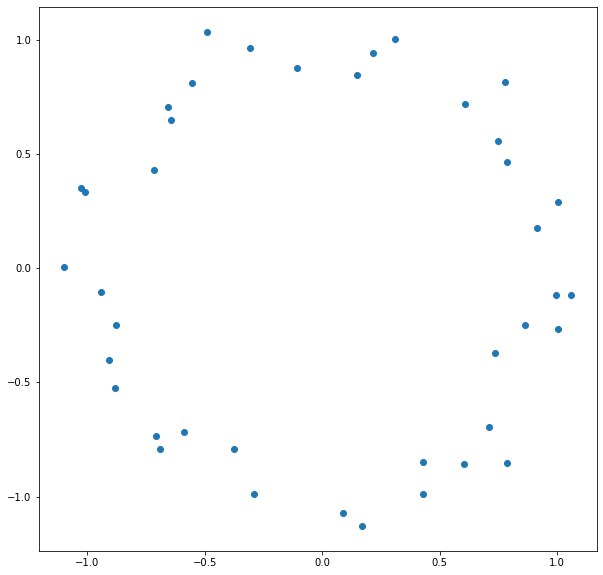

In [16]:
# plotting cities
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1])

In [17]:
from scipy.spatial import distance
from numpy.ma.core import ceil

# Euclidean Distance (l2)
def e_distance(x, y):
    return distance.euclidean(x,y)

# Manhattan Distance (l1)
def m_distance(x,y):
    return distance.cityblock(x,y)

# Function to decide winning neuron
def winning_neuron(som, input, num_row, num_dim):
    shortest_dis = np.sqrt(num_dim) # initialized as the max distance inside plot
    winner = 0
    for row in range(num_row):
        dist = e_distance(som[row], input)
        if dist<=shortest_dis:
            shortest_dis = dist
            winner = row
    return winner

# Learning rate decay
def decay(t, iteration, alpha=0.5):
    coeff = 1/(1+(t/iteration))
    return alpha*coeff

In [18]:
num_row = N_neurons
num_dim = X.shape[1] # i.e number of features in data
som = np.random.random_sample((num_row, num_dim))
iteration = 60
r = 3 # radius
plt.figure(figsize=(10,10))
for t in range(iteration):
    if (t+1)%10 == 0:
        print('Iteration: ', t+1)
    if t == (iteration/2):
        r = r//2; # radius halved
    alpha = decay(t=t, iteration=iteration)
    for i in range(len(X)):
        winning = winning_neuron(som, X[i], num_row, num_dim)
        for row in range(num_row):
            if (m_distance(row, winning)%(num_row-r)) <= r: # last neuron in linear layer connected to first neuron
                som[row] += alpha*(X[i]-som[row])
print('Complete')

Iteration:  10
Iteration:  20
Iteration:  30
Iteration:  40
Iteration:  50
Iteration:  60
Complete


<Figure size 720x720 with 0 Axes>

In [19]:
visit_order = np.argsort([winning_neuron(som, p, num_row, num_dim) for p in X])

In [20]:
visit_order = np.concatenate((visit_order, [visit_order[0]]))

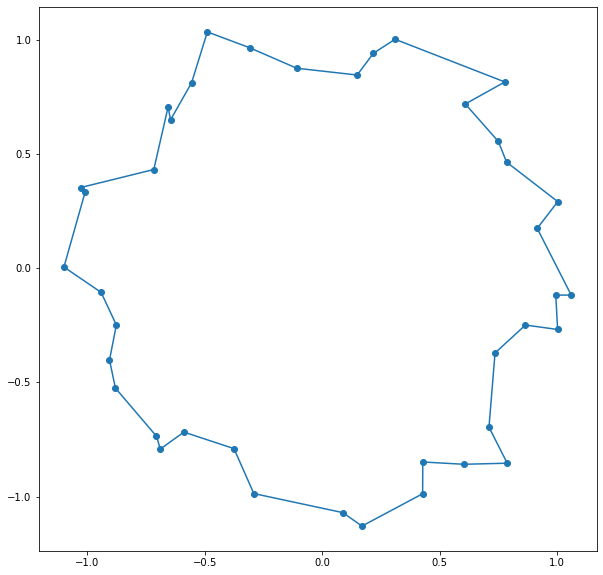

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1])
plt.plot(X[visit_order][:,0], X[visit_order][:,1])